In [1612]:
!git add "Introduction\ to\ Pandas.ipynb"

In [1613]:
!git commit -m "updating Pandas introduction"

[master 5286267] updating Pandas introduction
 1 file changed, 552 insertions(+), 12 deletions(-)


In [1614]:
!git push origin master

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.34 KiB | 1.17 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/Luc-Bertin/TDs_ESILV.git
   aa01f13..5286267  master -> master


In [1254]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Discover Pandas 

Pandas is built on top of Numpy

First, check the overview of the package [here](https://pandas.pydata.org/docs/getting_started/overview.html)

>`pandas.DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table.
It got rows and columns' labels and can greatly contain and handle missing data.

Dealing with initially less structured, clean and complete data consists in most of the time spent by the data scientist.

In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.25.3'

In [3]:
pd?

In [176]:
%%timeit
3+2

14.7 ns ± 0.386 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In the rest of this tutorial we will mainly work on the `DataFrame` class, although we first have to introduce 2 other core data structures provided by the package: the `Series` and the `Index`, as they are each constitutive of `DataFrame` and the former share very similar API with the DataFrame class.

## Series

one-dimensional array of indexed data. 

In [1007]:
pd.Series([3,2,1])

0    3
1    2
2    1
dtype: int64

with explicit index definition !

Example:

In [1008]:
serie_1 = pd.Series([3,2,1], index=[93,129, 219394])

In [1009]:
serie_1

93        3
129       2
219394    1
dtype: int64

In [1010]:
serie_1.index

Int64Index([93, 129, 219394], dtype='int64')

a dictionnary-like, object with possible keys repetition

In [1011]:
serie = pd.Series([3,2,1], index=["rené", "rené", "jean"])

In [1012]:
serie

rené    3
rené    2
jean    1
dtype: int64

In [1013]:
serie.values

array([3, 2, 1])

In [1014]:
serie.index

Index(['rené', 'rené', 'jean'], dtype='object')

* Access by key

In [1015]:
serie['rené']

rené    3
rené    2
dtype: int64

* Set a new key pair

In [1016]:
serie['joseph'] = 5

* Change a value for a key

In [1017]:
serie['rené'] = 4

In [1018]:
serie

rené      4
rené      4
jean      1
joseph    5
dtype: int64

In [1019]:
serie['rené'] = [4,3]

In [1020]:
serie

rené      4
rené      3
jean      1
joseph    5
dtype: int64

* delete a key val pair

In [1021]:
del serie["rené"]

In [1022]:
serie

jean      1
joseph    5
dtype: int64

In [1023]:
serie[0:4:2] # indexing: not possible in a simple dict 

jean    1
dtype: int64

* lookup 

In [1024]:
print('rené' in serie)
print("jean" in serie)

False
True


- When index is unique, pandas use a hashtable just like `dict`s : O(1). 
- When index is non-unique and sorted, pandas use binary search O(logN)
- When index is non-unique and not-sorted pandas need to check all the keys just like a list look-up: O(N).



using a `dict` in the `pd.Series` constructor automatically assigns the index as the ordered keys in the `dict` (for Python 3.6 and later though, the index is in the same order as the insertion order).


In [1025]:
test = pd.Series(dict(zip(["ea","fzf","aeif"], [2,3,2])))
# with zip or using a dict
test2 = pd.Series({"ea":2, "fzf":3, "aeif":2}, index=["ea"])

In [1026]:
test

aeif    2
ea      2
fzf     3
dtype: int64

In [1027]:
test2

ea    2
dtype: int64

**If multiple different types reside in a Series, all of the data will get upcasted to a dtype that accommodates all of the data involved.**



In [1030]:
test2 = pd.Series({"ea":2, "fzf":3, "aeif":"zf"}, index=["ea"])
test2

ea    2
dtype: object

In [1033]:
test2 = pd.Series({"ea":2, "fzf":3, "aeif":2.4}, index=["ea"])
test2

ea    2.0
dtype: float64

**dtype=object** means that the best common type infered representation for the contents of the `pd.Series` is that they are Python objects.

this also mean performance decreases, **any operations on the data will be done at the Python level** (1)

## selection in Series

In [1038]:
(test>2) # return a boolean array we can later use to filter the values we want (returning True)

aeif    False
ea      False
fzf      True
dtype: bool

In [1039]:
(test<4)

aeif    True
ea      True
fzf     True
dtype: bool

In [1041]:
# not "and" but "&" : & operator is a bitwise "and"
(test>2) & (test < 4) 

aeif    False
ea      False
fzf      True
dtype: bool

In [1042]:
type((test>2) & (test < 4) )

pandas.core.series.Series

In [1043]:
# mask ( the last expression whose result is an pd.Serie stored in the variable mask)
mask = (test>2) & (test < 4)

In [1044]:
test[mask]

fzf    3
dtype: int64

In [1046]:
# fancy indexing (<=> selecting multiple indexes using a list of indexes)
test[["ea", "fzf"]]

ea     2
fzf    3
dtype: int64

In [1048]:
# explicit index slicing (using the labels of the indexes)
test["aeif": "fzf"]

aeif    2
ea      2
fzf     3
dtype: int64

In [1049]:
# implicit index slicing (using integers)
test[0: 2]

aeif    2
ea      2
dtype: int64

- using explicit indexes while slicing ***include*** the final index

- using implicit index in slicing ***exclude*** the final index

What about i defined **explicit integer indexes at first** and i want to slice ? 🙄

## using loc

In [1061]:
serie2 = pd.Series({1:4, 2:8, 3:51})
serie2

1     4
2     8
3    51
dtype: int64

In [1076]:
serie2[3] # indexing: defaults to select explicit index /  with label 3
serie2[2:3] # slicing: defaults to select implicit index

51

3    51
dtype: int64

In [1085]:
serie2.loc[1] # indexing: on explicit index
serie2.loc[2:3] # slicing: on explicit index

4

2     8
3    51
dtype: int64

In [1086]:
serie2.iloc[1] # indexing: on implicit index
serie2.iloc[2:3] # slicing: on implicit index

8

3    51
dtype: int64

In [1090]:
serie2.loc[1:5] # slicing: explicit index 
serie2.iloc[1:5] # slicing: implicit index 

1     4
2     8
3    51
dtype: int64

2     8
3    51
dtype: int64

In [1094]:
serie2.loc[[1,2]] # fancy indexing
serie2.iloc[[1,2]] # fancy indexing 

1    4
2    8
dtype: int64

2     8
3    51
dtype: int64

### Index object 

* are immutable

In [1096]:
serie2.index[0]=18

TypeError: Index does not support mutable operations

* can be sliced or indexed (just like an array)

In [1104]:
serie2.index[0]

1

In [1105]:
serie2.index[:2]

Int64Index([1, 2], dtype='int64')

In [1106]:
serie2.index & {1, 5}

Int64Index([1], dtype='int64')

In [1107]:
serie2.index ^ {1,5}

Int64Index([2, 3, 5], dtype='int64')

# DataFrame

* sequence of "aligned" Series objects (sharing same indexes / like an Excel file )

* each Series object is a column

* Hence `pd.DataFrame` can be seen as dictionnary of Series objects

* Flexible rows and columns' labels (`Index` objects for both)

In [1205]:
serie1 = pd.Series({"Luc": 25, "Corentin":29, "René": 40})
serie2 = pd.Series({"René": "100%", "Corentin": "25%", "Luc": "20%"})

In [1206]:
# dictionnary of pd.Series
df = pd.DataFrame({"note": serie1, 
                   "charge_de_travail": serie2})

In [1207]:
df

,charge_de_travail,note
Corentin,25%,29
Luc,20%,25
René,100%,40


In [1208]:
# index objects on both columns and rows
df.index
df.columns

Index(['Corentin', 'Luc', 'René'], dtype='object')

Index(['charge_de_travail', 'note'], dtype='object')

> If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

In [1209]:
df2 = pd.DataFrame({"note": serie1, 
                    "charge_de_travail": serie2}, 
                   index=["Corentin", "Luc", "Julie"],
                   columns=["note", "autre"])
df2 
# filled with NaN ("Not A Number") 
# when no value exist for the given (row_index, column_index)

,note,autre
Corentin,29.0,NaN
Luc,25.0,NaN
Julie,NaN,NaN


In [1210]:
df.shape

(3, 2)

shape: tuple of the number of elements with respect to each dimension

For a 1D array, the shape would be (n,) where n is the number of elements in your array.

For a 2D array, the shape would be (n,m) where n is the number of rows and m is the number of columns in your array

accessing a column/`Serie` by key : 

In [1211]:
df['note']

Corentin    29
Luc         25
René        40
Name: note, dtype: int64


Using the attribute notation is not advised for assignements as some methods or attributes of the same name already exist in the DataFrame class' own namespace

In [1212]:
df.note

Corentin    29
Luc         25
René        40
Name: note, dtype: int64

The `DataFrame` can be constructed using a list of dictionary
each dict element is a row
each key of each dict refers a column

In [1213]:
df2 = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
df2

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [1214]:
pd.DataFrame([(1, 1, 3), (1, 2,4), (1,1,1)],
             columns=["a", "b", "c"],
            index=["Jean", "Jacques", "René"])

,a,b,c
Jean,1,1,3
Jacques,1,2,4
René,1,1,1


Indexing works the same way as for Series, but you have to account this time for the second dimension

`df.loc_or_iloc[ dim1 = rows, dim2 = columns]`


In [1215]:
df.iloc[:3, :1] # implicit indexing

,charge_de_travail
Corentin,25%
Luc,20%
René,100%


**columns slicing/indexing** is optional here, without specifying it, you **select only rows** 

In [1216]:
df.iloc[:3]

,charge_de_travail,note
Corentin,25%,29
Luc,20%,25
René,100%,40


In [1217]:
df.loc["Corentin":"Luc","charge_de_travail":"note"] # explicit indexing

,charge_de_travail,note
Corentin,25%,29
Luc,20%,25


same thing here, **only rows selected**

In [1218]:
df.loc[:"Corentin"]

,charge_de_travail,note
Corentin,25%,29


In [1219]:
df.loc[["Corentin", "Luc"], :] # mixing slicing and fancy indexing

,charge_de_travail,note
Corentin,25%,29
Luc,20%,25


Something to mention here, by default, without using indexers like `loc` and `iloc`:
- indexing directly `df`, performs the indexing on its columns **(ex:1)**
- slicing by conditions, or using a slice notation (::), is performed on rows **(ex:2)**

(1)

In [1220]:
df[["charge_de_travail"]] # indexing directly df defaults to columns

,charge_de_travail
Corentin,25%
Luc,20%
René,100%


(2) 

In [1221]:
mask = df["charge_de_travail"]=="25%" 
mask

Corentin     True
Luc         False
René        False
Name: charge_de_travail, dtype: bool

In [1222]:
df[mask] # masking directly df is operated on rows

,charge_de_travail,note
Corentin,25%,29


In [1223]:
df[:3] # slicing directly df is operated on rows

,charge_de_travail,note
Corentin,25%,29
Luc,20%,25
René,100%,40


## Operations on Pandas

Element-wise operations are made easy in `Pandas`.


* 3 - 2 <=> substract(3,2) <=> binary operation (2 inputs)
* -2 <=> neg(2) <=> unary operation (one input)
* sin(2) <=> unary operation (one input)

in `Pandas` : 
  - unary operations on `df`s elements preserve the indexes.
  - binary operations on elements from 2 `df`s align the operations on the indexes.

In [1224]:
import numpy as np 

In [1225]:
rng = np.random.RandomState(42) # for reproducibility
data = rng.randint(0,10, (3,4)) # creating an array of random integer values

In [1226]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [1227]:
df2 = pd.DataFrame(rng.randint(0,10, (4,4)))
df2

,0,1,2,3
0,7,2,5,4
1,1,7,5,1
2,4,0,9,5
3,8,0,9,2


In [1228]:
df2 = df2.reindex([1,0,2,3]) #just to show rearranged indexes (does not change the association with the indexed data)
df2

,0,1,2,3
1,1,7,5,1
0,7,2,5,4
2,4,0,9,5
3,8,0,9,2


In [1229]:
df + df2

,0,1,2,3
0,13.0,5.0,12.0,8.0
1,7.0,16.0,7.0,7.0
2,11.0,4.0,12.0,12.0
3,NaN,NaN,NaN,NaN


on line of index 0, `7+6 = 13`
 which shows indexes had been aligned during the binary operation

also notice the union of the indices during the binary operation. If one may not exist in either of the dataframes and the result can't be evalutated, `NaN` fill the concerned entries

In [1230]:
df.__add__(df2, fill_value=25) # used in the binary operation 25+8 = 33)

,0,1,2,3
0,13.0,5.0,12.0,8.0
1,7.0,16.0,7.0,7.0
2,11.0,4.0,12.0,12.0
3,33.0,25.0,34.0,27.0


#### Operation between pandas series and a pandas dataframe

From the Numpy Docs

> Broadcasting is **how numpy treats arrays with different shapes during arithmetic operations**. 
Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they **have compatible shapes.**
Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python

The only requirement for broadcasting is a way aligning array dimensions such that either :
* aligned dimensions are equal (so that operations are done on an element-by-element basis from 2 arrays of same shape)
* one of the aligned dimensions is 1 (in other words, dimensions with size 1 are stretched or “copied” to match the dimension of the other array)

Operations between `pandas.Series` and `pandas.DataFram` respect the numpy broadcasting rules:
>  If the two arrays **differ in their number of dimensions**, the shape of the one with **fewer dimensions is padded with ones on its leading (left) side.'**  (2)

In [1231]:
df.shape, df.iloc[1].shape, df.iloc[1][np.newaxis, :].shape

((3, 4), (4,), (1, 4))

In [1232]:
df
df.iloc[1]

,0,1,2,3
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


0    6
1    9
2    2
3    6
Name: 1, dtype: int64

In [1233]:
df - df.iloc[1] #row-wise (1,4) copied other 3 times => (3,4)

,0,1,2,3
0,0,-6,5,-2
1,0,0,0,0
2,1,-5,1,1


In [1234]:
df - df.iloc[1].sample(4) # again: kept the index alignements during computation

,0,1,2,3
0,0,-6,5,-2
1,0,0,0,0
2,1,-5,1,1


if you want to do it columnwise and not row wise

In [1236]:
df.__sub__(df.iloc[1], axis=0) # caution, the indexes operations will be based on the column indexes

,0,1,2,3
0,0.0,-3.0,1.0,-2.0
1,-3.0,0.0,-7.0,-3.0
2,5.0,2.0,1.0,5.0
3,NaN,NaN,NaN,NaN


In [1237]:
df.columns = ["a","b",0,"d"]
df

,a,b,0,d
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [1238]:
df.iloc[1]

a    6
b    9
0    2
d    6
Name: 1, dtype: int64

In [1240]:
df.__sub__(df.iloc[1], axis=0) 
# based on the column indexes
# only 0 match with one of the column index label

,a,b,0,d
0,4.0,1.0,5.0,2.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN


In [1247]:
df[0].shape, df.shape

((3,), (3, 4))

In [1248]:
df2 = df - pd.DataFrame([(1,2), (4,5), (9,19)], columns=["a","b"])
df2

,0,a,b,d
0,NaN,5,1,NaN
1,NaN,2,4,NaN
2,NaN,-2,-15,NaN



### dtypes

In [862]:
print(df.dtypes)
print(df2.dtypes) 
# NaN is a floating-point value, 
# hence the Series embedding it gets its dtype upcasted to float (if it were an int)
# this pd.Series supports fast operations

a    int64
b    int64
0    int64
d    int64
dtype: object
0    float64
a      int64
b      int64
d    float64
dtype: object


In [863]:
%timeit np.arange(1E6, dtype="int").sum()

1.14 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [864]:
%timeit np.arange(1E6, dtype="object").sum()

77.8 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [865]:
%timeit np.arange(1E6, dtype="float").sum()

1.25 ms ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Managing missing values

In [1250]:
pd.Series([2, np.nan]).isnull()

0    False
1     True
dtype: bool

In [1251]:
df2.iloc[0,2] = np.nan

In [1252]:
df2
df2.isnull()

,0,a,b,d
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


,0,a,b,d
0,True,False,True,True
1,True,False,False,True
2,True,False,False,True


In [1255]:
pd.Series([2, np.nan]).dropna()

0    2.0
dtype: float64

In [1257]:
df2
df2.dropna(axis=1) # drop a column when contains one NA value
df2.dropna(axis=0) # drop a row when contains one NA value
df2.dropna(axis=1, how="all") # drop a column when contains all NA value
df2.dropna(axis=1, thresh=3) # drop a column if below 3 non-NA value

,0,a,b,d
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


,a
0,5
1,2
2,-2


,0,a,b,d


,a,b
0,5,NaN
1,2,4.0
2,-2,-15.0


,a
0,5
1,2
2,-2


In [1259]:
df2
df2.fillna(value=2) #fill NA with specified value
# fill NA backwards 
# i.e. using the following non-null element
# to fill preceding NA ones
# defaults on rows basis
df2.fillna(method="bfill") 
df2.fillna(method="bfill", axis=1) # on column basis

,0,a,b,d
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


,0,a,b,d
0,2.0,5,2.0,2.0
1,2.0,2,4.0,2.0
2,2.0,-2,-15.0,2.0


,0,a,b,d
0,NaN,5,4.0,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


,0,a,b,d
0,5.0,5.0,NaN,NaN
1,2.0,2.0,4.0,NaN
2,-2.0,-2.0,-15.0,NaN


### MultiIndex

In [1260]:
data = {('group1', 'Luc'): 18,
        ('group2', 'Jean'): 23,
        ('group1', 'Seb'): 17,
        ('group1', 'René'): 4,
        ('group2', 'Alex'): 4,
        ('group3', 'Sophie'): 25,
        ('group2', 'Camille'): 2 }
serie = pd.Series(data)
serie

group1  Luc        18
        René        4
        Seb        17
group2  Alex        4
        Camille     2
        Jean       23
group3  Sophie     25
dtype: int64

In [1261]:
serie[:,"Luc"]

group1    18
dtype: int64

In [1271]:
serie["group1"]

Luc     18
René     4
Seb     17
dtype: int64

In [1273]:
serie[serie>=18]

group1  Luc       18
group2  Jean      23
group3  Sophie    25
dtype: int64

In [1274]:
# creating the multi-index using cartesian product
index = pd.MultiIndex.from_arrays([['group1', 'a', 'b', 'b'], ["Luc", 2, 1, 2]])

In [1268]:
serie.reindex(index) # works for multi-index too !
# Conform Series to new index with optional filling logic, placing
# NA/NaN in locations having no value in the previous index

group1  Luc    18.0
a       2       NaN
b       1       NaN
        2       NaN
dtype: float64

In [1269]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns) 
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      52.0  36.4  38.0  36.6  32.0  38.1
     2      28.0  37.7  47.0  35.4  50.0  36.4
2014 1      30.0  37.0  16.0  36.6  49.0  37.7
     2      52.0  36.8  31.0  35.5  36.0  37.6

In [1280]:
health_data.loc[:2013 , ("Bob")]

type          HR  Temp
year visit            
2013 1      52.0  36.4
     2      28.0  37.7

In [1282]:
#health_data.loc[(:,1),["Bob"]] # can't use the tuple to define index

In [1285]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,52.0,38.0,32.0
2014,1,30.0,16.0,49.0


### Unstacking and Stacking: a matter of dimnesionality

Creating a multiIndex rather than a simlpe Index is like **creating an extra-dimension in our dataset.**

We can take for **each year**, a **2D sub-dataframe** composed of **Bob's HR visits**.

This DataFrame hence can be seen as having **4 dimensions.**

we can go back and forth from a multi-index series to a dataframe using unstack, so that one of the index level occupies the extra dimension given by the transition to a `DataFrame`


In [1290]:
serie

group1  Luc        18
        René        4
        Seb        17
group2  Alex        4
        Camille     2
        Jean       23
group3  Sophie     25
dtype: int64

In [1291]:
serie.unstack() #level -1 by default = most inner one

,Alex,Camille,Jean,Luc,René,Seb,Sophie
group1,NaN,NaN,NaN,18.0,4.0,17.0,NaN
group2,4.0,2.0,23.0,NaN,NaN,NaN,NaN
group3,NaN,NaN,NaN,NaN,NaN,NaN,25.0


In [1299]:
df3 = serie.unstack(level=0)
df3

,group1,group2,group3
Alex,NaN,4.0,NaN
Camille,NaN,2.0,NaN
Jean,NaN,23.0,NaN
Luc,18.0,NaN,NaN
René,4.0,NaN,NaN
Seb,17.0,NaN,NaN
Sophie,NaN,NaN,25.0


In [1300]:
# to reset the index and create it as a simple new column you can use reset_index()
df3.reset_index()

,index,group1,group2,group3
0,Alex,NaN,4.0,NaN
1,Camille,NaN,2.0,NaN
2,Jean,NaN,23.0,NaN
3,Luc,18.0,NaN,NaN
4,René,4.0,NaN,NaN
5,Seb,17.0,NaN,NaN
6,Sophie,NaN,NaN,25.0


You can do some aggregation by index level (we are going to see this extensively on `GroupBy` section


In [1307]:
health_data.mean(level='year')
health_data.mean(level='visit')
health_data.mean(axis=1, level='type')

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     40.0  37.05  42.5  36.00  41.0  37.25
2014     41.0  36.90  23.5  36.05  42.5  37.65

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
visit                                        
1        41.0  36.70  27.0  36.60  40.5  37.9
2        40.0  37.25  39.0  35.45  43.0  37.0

type               HR       Temp
year visit                      
2013 1      40.666667  37.033333
     2      41.666667  36.500000
2014 1      31.666667  37.100000
     2      39.666667  36.633333

### pd.concat

In [1311]:
df1
df2

,0,a,b,d
0,2.0,False,2.0,2.0
1,2.0,False,0.0,2.0
2,2.0,False,0.0,2.0


,0,a,b,d
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


In [1318]:
pd.concat([df1, df2], axis=0) # concatenate rows (default)
pd.concat([df1, df2], axis=1) # concatenate columns (default)

,0,a,b,d
0,2.0,0,2.0,2.0
1,2.0,0,0.0,2.0
2,2.0,0,0.0,2.0
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


,0,a,b,d,0,a,b,d
0,2.0,False,2.0,2.0,NaN,5,NaN,NaN
1,2.0,False,0.0,2.0,NaN,2,4.0,NaN
2,2.0,False,0.0,2.0,NaN,-2,-15.0,NaN


the indices are preserved, even duplicated

`verify_integrity=True` can check if index from each df are differents

`ignore_index=True` just override the indexes after concatenation by a new integer one

`keys = ["source1", "source2"]` leave the indexes as is but create a new outer level from the 2 different sources/df of the data concatenated

In [1320]:
pd.concat([df1, df2], axis=0, keys=["source1", "source2"])

0  a     b    d
source1 0  2.0  0   2.0  2.0
        1  2.0  0   0.0  2.0
        2  2.0  0   0.0  2.0
source2 0  NaN  5   NaN  NaN
        1  NaN  2   4.0  NaN
        2  NaN -2 -15.0  NaN

`join='inner'` keeps only the columns in common from the concatenation

In [1333]:
df2["note"] = 2
df2

,0,a,b,d,note
0,NaN,5,NaN,NaN,2
1,NaN,2,4.0,NaN,2
2,NaN,-2,-15.0,NaN,2


In [1336]:
pd.concat([df1, df2], axis=0, join='inner')

,0,a,b,d
0,2.0,0,2.0,2.0
1,2.0,0,0.0,2.0
2,2.0,0,0.0,2.0
0,NaN,5,NaN,NaN
1,NaN,2,4.0,NaN
2,NaN,-2,-15.0,NaN


In [1342]:
serie1
serie2
serie1.append(serie2)

Corentin    29
Luc         25
René        40
dtype: int64

Corentin     25%
Luc          20%
René        100%
dtype: object

Corentin      29
Luc           25
René          40
Corentin     25%
Luc          20%
René        100%
dtype: object

In [1343]:
df1.append(df2)

/Users/lucbertin/.pyenv/versions/3.5.7/lib/python3.5/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,0,a,b,d,note
0,2.0,0,2.0,2.0,NaN
1,2.0,0,0.0,2.0,NaN
2,2.0,0,0.0,2.0,NaN
0,NaN,5,NaN,NaN,2.0
1,NaN,2,4.0,NaN,2.0
2,NaN,-2,-15.0,NaN,2.0


### Merge

In [1371]:
df_account = pd.DataFrame({'accountNumber': ["AC1", "AC2", "AC3", "AC4"],
                   'Amount': [10000, 109300, 2984, 1999],
                   'Name': ["LIVRET A", "Compte Épargne Retraite", "Quadretto", "Compte Courant"]})
df_client = pd.DataFrame({'id_account': ["AC1", "AC2", "AC3", "AC4", "AC5"],
                   'Name': ["Luc", "René", "Jean", "Jean", "Joseph"],
                   'id_client': ["ID1099", "ID1091", "ID1018", "ID1018", "ID1021"]})
df_account
df_client

,Amount,Name,accountNumber
0,10000,LIVRET A,AC1
1,109300,Compte Épargne Retraite,AC2
2,2984,Quadretto,AC3
3,1999,Compte Courant,AC4


,Name,id_account,id_client
0,Luc,AC1,ID1099
1,René,AC2,ID1091
2,Jean,AC3,ID1018
3,Jean,AC4,ID1018
4,Joseph,AC5,ID1021


In [1372]:
pd.merge(left=df_account, right=df_client, 
         left_on="accountNumber", 
         right_on="id_account",
         how='inner')

,Amount,Name_x,accountNumber,Name_y,id_account,id_client
0,10000,LIVRET A,AC1,Luc,AC1,ID1099
1,109300,Compte Épargne Retraite,AC2,René,AC2,ID1091
2,2984,Quadretto,AC3,Jean,AC3,ID1018
3,1999,Compte Courant,AC4,Jean,AC4,ID1018


In [1375]:
df_merged = pd.merge(left=df_account, right=df_client, 
         left_on="accountNumber", 
         right_on="id_account",
         how='right',
         suffixes=["_account", "_client"])
df_merged

,Amount,Name_account,accountNumber,Name_client,id_account,id_client
0,10000.0,LIVRET A,AC1,Luc,AC1,ID1099
1,109300.0,Compte Épargne Retraite,AC2,René,AC2,ID1091
2,2984.0,Quadretto,AC3,Jean,AC3,ID1018
3,1999.0,Compte Courant,AC4,Jean,AC4,ID1018
4,NaN,NaN,NaN,Joseph,AC5,ID1021


In [1376]:
# to drop the (same) column we have been merging on
df_merged.drop('id_account', axis=1)

,Amount,Name_account,accountNumber,Name_client,id_client
0,10000.0,LIVRET A,AC1,Luc,ID1099
1,109300.0,Compte Épargne Retraite,AC2,René,ID1091
2,2984.0,Quadretto,AC3,Jean,ID1018
3,1999.0,Compte Courant,AC4,Jean,ID1018
4,NaN,NaN,NaN,Joseph,ID1021


In [1482]:
#df_notes["eleve"] = (df_notes
# .eleve
# .astype("category")
# .cat.rename_categories(
#     new_categories=
#        ["eleve{}".format(i) for i in range(df_notes.eleve.nunique())]
# )
#)

### Manipulating columns with strings

For the following sections, we are going to use real world data of students'grades from an exam I gave 😜 The data has been anonymised to fit GDPR regulation.

It has been retrieved by scrapping automatically the online web app that stores the results from each passed quizz.

You will see along the way we will need to make multiple modifications to our original data.

In [1720]:
# !curl --help 
# option :  -o, --output <file> 
# Write to file instead of stdout

In [1721]:
!curl https://raw.githubusercontent.com/Luc-Bertin/TDs_ESILV/master/td3_discover_pandas/notes_eleves.csv -o "notes.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21979  100 21979    0     0  66805      0 --:--:-- --:--:-- --:--:-- 66805


In [1722]:
df_notes = pd.read_csv("notes.csv", index_col=0)
# showing just the first n rows
df_notes.head(5)
# or the last n rows
df_notes.tail(5)

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1
4,eleve8,"57,14 %",Unknown,td1


,eleve,note,groupe,quizz
741,eleve174,100 %,ibo5,td3
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3
745,eleve196,"66,67 %",ibo5,td3


What is a vectorized function: it is a function that applies on the whole sequence rather than each element as input.

This is the case for numpy functions like `np.mean`, `np.sum`, `np.std` which apply on a numerically valued input array as a whole, so the loop is moved from the Python-level to the [C one](https://stackoverflow.com/questions/58071631/is-numpy-vectorization-using-c-loops)

> Numeric types include: `int`, `float`, `datetime`, `bool`, `category`. They exclude `object` dtype and can be held in **contiguous memory blocks**. See [here too, concerning C contiguous array stored in memory when creating a numpy array](https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays).

> Why are numpy operations more efficient than simple crude Python ?  as we've seen earlier **Everything in Python is an object**. This includes, unlike C, numbers. Python types therefore have an **overhead which does not exist with native C types**. NumPy methods are **usually C-based.** 

check [here](https://stackoverflow.com/questions/52673285/performance-of-pandas-apply-vs-np-vectorize-to-create-new-column-from-existing-c)

> np.vectorize is fake vectorisation. According to [documentation]( https://docs.scipy.org/doc/numpy-1.9.1/reference/generated/numpy.vectorize.html): The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop. It means there is no reazon in vectorize of function wich could be applied directly as it is in your example. Actually this could lead to degraded performance. Main goal of the "vectorize" is to hide a for loop from you code. But it will not avoid it neither change expected results.


This link provides a good an example of simple [vectorization](https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6).

Numpy does not provide vectorization functions for arrays of strings.

Pandas provide vectorized [str operations](https://stackoverflow.com/questions/50744369/how-to-speed-up-pandas-string-function). Pros are that you don't have to write any loop and can take the column/Series as a whole. Cons are that they are not actually faster than using a simply apply. String operations are inherently difficult to vectorize. Pandas treats strings as objects, and all operations on objects fall back to a slow, loopy implementation. 

Already provided Pandas vectorized string methods available in `.str.`

In [1723]:
df_notes["eleve"] = df_notes.eleve.str.capitalize()
df_notes

,eleve,note,groupe,quizz
0,Eleve0,"71,43 %",Unknown,td1
1,Eleve1,100 %,Unknown,td1
2,Eleve4,"71,43 %",Unknown,td1
3,Eleve6,"42,86 %",Unknown,td1
4,Eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,Eleve174,100 %,ibo5,td3
742,Eleve166,"66,67 %",ibo5,td3
743,Eleve176,"83,33 %",ibo5,td3
744,Eleve186,100 %,ibo5,td3


In [1724]:
mask = df_notes.groupe.str.startswith("U")
mask

0       True
1       True
2       True
3       True
4       True
       ...  
741    False
742    False
743    False
744    False
745    False
Name: groupe, Length: 746, dtype: bool

In [1725]:
df_notes[mask]

,eleve,note,groupe,quizz
0,Eleve0,"71,43 %",Unknown,td1
1,Eleve1,100 %,Unknown,td1
2,Eleve4,"71,43 %",Unknown,td1
3,Eleve6,"42,86 %",Unknown,td1
4,Eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
87,Eleve202,"57,14 %",Unknown,td1
88,Eleve203,"57,14 %",Unknown,td1
89,Eleve204,"71,43 %",Unknown,td1
90,Eleve205,"42,86 %",Unknown,td1


In [1726]:
df_notes.note.str.split(',')

0      [71, 43 %]
1         [100 %]
2      [71, 43 %]
3      [42, 86 %]
4      [57, 14 %]
          ...    
741       [100 %]
742    [66, 67 %]
743    [83, 33 %]
744       [100 %]
745    [66, 67 %]
Name: note, Length: 746, dtype: object

In [1727]:
(df_notes.note
 .str.replace("%","") # replace all occurences of "%" as ""
 .str.replace(",", ".") # replace all occurences of "," as "."
 .astype(float)
)

0       71.43
1      100.00
2       71.43
3       42.86
4       57.14
        ...  
741    100.00
742     66.67
743     83.33
744    100.00
745     66.67
Name: note, Length: 746, dtype: float64

In [1728]:
(df_notes.note
 .str.findall("(\d+),?(\d+)?") #regex to find all matching groups in each element of the Series
 .str[0] # vectorized element access in the column, works for all iterable, hence even a list in a pd.Series, 
 .str.join(".") # join the lists with "." rather than ','
 .str.rstrip('.') # take off the last dot if exists
 .astype(float) # convert to float type
) 

0       71.43
1      100.00
2       71.43
3       42.86
4       57.14
        ...  
741    100.00
742     66.67
743     83.33
744    100.00
745     66.67
Name: note, Length: 746, dtype: float64

In [1729]:
serie_notes =\
( 
df_notes.note
 .str.extract("(\d+),?(\d+)?") # expand to multiple cols
 .fillna(0) # fill NaN as 0 when no matched group
 .astype(float) # convert to float
)
serie_notes[0] += serie_notes[1]/100
serie_notes.drop(1, axis=1,inplace=True)

In [1730]:
df_notes.note = serie_notes

In [1731]:
df_notes

,eleve,note,groupe,quizz
0,Eleve0,71.43,Unknown,td1
1,Eleve1,100.00,Unknown,td1
2,Eleve4,71.43,Unknown,td1
3,Eleve6,42.86,Unknown,td1
4,Eleve8,57.14,Unknown,td1
...,...,...,...,...
741,Eleve174,100.00,ibo5,td3
742,Eleve166,66.67,ibo5,td3
743,Eleve176,83.33,ibo5,td3
744,Eleve186,100.00,ibo5,td3


## GroupBy

In [1732]:
df_notes.head(3)

,eleve,note,groupe,quizz
0,Eleve0,71.43,Unknown,td1
1,Eleve1,100.00,Unknown,td1
2,Eleve4,71.43,Unknown,td1


Groupby applies the ***"split, apply, combine"*** method.

- We first have to use a `key` to groupby, i.e. a column of different labels that will serve to ***split*** the main `df` into different subsets (one for each label in the concerned column), just as we would do a GROUP BY in SQL syntax.

In [1621]:
df_notes.groupby('groupe') 

No computation is done yet

This result in a DataFrameGroupBy object we can iterate on.

In [1625]:
for name_group, group in df_notes.groupby('groupe'):
    # the label used , the df subset (one for each label)
    print( "label used {}, dataframe shape {}".format(name_group,group.shape)) 

label used Unknown, dataframe shape (92, 4)
label used ibo1, dataframe shape (117, 4)
label used ibo2, dataframe shape (57, 4)
label used ibo3, dataframe shape (85, 4)
label used ibo4, dataframe shape (81, 4)
label used ibo5, dataframe shape (115, 4)
label used ibo6, dataframe shape (85, 4)
label used ibo7, dataframe shape (114, 4)


- Notice that we are not limited by grouping over one column keys.

In [1628]:
for name_group, group in df_notes.groupby(['groupe', "quizz"]):
    # the label used , the df subset (one for each label)
    print( "label used {}, dataframe shape {}".format(name_group,group.shape)) 

label used ('Unknown', 'td1'), dataframe shape (92, 4)
label used ('ibo1', 'td1'), dataframe shape (30, 4)
label used ('ibo1', 'td2'), dataframe shape (30, 4)
label used ('ibo1', 'td3'), dataframe shape (27, 4)
label used ('ibo1', 'td4'), dataframe shape (30, 4)
label used ('ibo2', 'td2'), dataframe shape (30, 4)
label used ('ibo2', 'td3'), dataframe shape (27, 4)
label used ('ibo3', 'td2'), dataframe shape (30, 4)
label used ('ibo3', 'td3'), dataframe shape (27, 4)
label used ('ibo3', 'td4'), dataframe shape (28, 4)
label used ('ibo4', 'td2'), dataframe shape (27, 4)
label used ('ibo4', 'td3'), dataframe shape (28, 4)
label used ('ibo4', 'td4'), dataframe shape (26, 4)
label used ('ibo5', 'td1'), dataframe shape (27, 4)
label used ('ibo5', 'td2'), dataframe shape (30, 4)
label used ('ibo5', 'td3'), dataframe shape (28, 4)
label used ('ibo5', 'td4'), dataframe shape (30, 4)
label used ('ibo6', 'td2'), dataframe shape (29, 4)
label used ('ibo6', 'td3'), dataframe shape (28, 4)
label use

This results in a mutli-index with:
- level0 = the group
- level1 = the quizz number

We can also index the `GroupByDataFrame` object by retrieving one Series (again no computation is done yet)

In [1637]:
df_notes.groupby(['groupe', "quizz"])["note"]

In [1638]:
for name_group, group in df_notes.groupby(['groupe', "quizz"])["note"]:
    print( "label used {}, \n{} shape {}".format(name_group, type(group), group.shape)) 

label used ('Unknown', 'td1'), 
<class 'pandas.core.series.Series'> shape (92,)
label used ('ibo1', 'td1'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo1', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo1', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo1', 'td4'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo2', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo2', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo3', 'td2'), 
<class 'pandas.core.series.Series'> shape (30,)
label used ('ibo3', 'td3'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo3', 'td4'), 
<class 'pandas.core.series.Series'> shape (28,)
label used ('ibo4', 'td2'), 
<class 'pandas.core.series.Series'> shape (27,)
label used ('ibo4', 'td3'), 
<class 'pandas.core.series.Series'> shape (28,)
label used ('ibo4', 'td4'), 
<class 'pandas.core.series.Series'> shape (2

#### Aggregation functions

We can now think about the "apply, combine" part

In [1733]:
df_notes.dtypes 

eleve      object
note      float64
groupe     object
quizz      object
dtype: object

Pandas provides us some functions to be applied on a dataframe or Series (.mean(), .sum(), .std(), .describe(), .min(), etc...), we can seemlessly append one of them to the GroupBy Object to operate **on each of the subsets DataFrames/Series created on the split step** (this is the ***apply*** step).

After applying the function to each split, a ***combined*** result is returned, in the form of a Series object or DataFrame.

Note that for those aggregating functions reduce the shape of the data e.g. summing or meaning on a Series result in a scalar (the sum or the mean), this will be operated over each Series groups from the **split** step.

In [1734]:
df_notes.groupby(['groupe'])["note"].mean()

groupe
Unknown    63.664022
ibo1       87.337607
ibo2       97.251053
ibo3       86.418824
ibo4       87.953580
ibo5       80.288957
ibo6       83.484000
ibo7       86.402456
Name: note, dtype: float64

In [1737]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean()

groupe   quizz
Unknown  td1      63.664022
ibo1     td1      67.618000
         td2      94.666667
         td3      90.739630
         td4      96.666333
ibo2     td2      98.666667
         td3      95.678148
ibo3     td2      88.666667
         td3      88.887037
         td4      81.630357
ibo4     td2      87.407407
         td3      87.500000
         td4      89.009231
ibo5     td1      53.967407
         td2      90.000000
         td3      90.475714
         td4      84.759667
ibo6     td2      90.344828
         td3      83.332857
         td4      76.529286
ibo7     td1      74.875517
         td2      85.714286
         td3      94.642500
         td4      90.637931
Name: note, dtype: float64

as we get a hierarchical index we can unstack to make use of the dimensionality brought by column indexesm

In [1738]:
_.unstack()

quizz,td1,td2,td3,td4
groupe,,,,
Unknown,63.664022,NaN,NaN,NaN
ibo1,67.618000,94.666667,90.739630,96.666333
ibo2,NaN,98.666667,95.678148,NaN
ibo3,NaN,88.666667,88.887037,81.630357
ibo4,NaN,87.407407,87.500000,89.009231
ibo5,53.967407,90.000000,90.475714,84.759667
ibo6,NaN,90.344828,83.332857,76.529286
ibo7,74.875517,85.714286,94.642500,90.637931


Something is unusual? why is there `NaN`? some class groups should have grades for each quizz.

In [1739]:
df_notes.isnull().sum()

eleve     0
note      0
groupe    0
quizz     0
dtype: int64

though all the data seems complete...

In [1711]:
df_notes.isnull().apply(sum, axis=0)

eleve     0
note      0
groupe    0
quizz     0
dtype: int64

Notice the `Unknown` group, we should look more into this...

In [1762]:
df_notes[df_notes.groupe == "Unknown"]

,eleve,note,groupe,quizz
0,Eleve0,71.43,Unknown,td1
1,Eleve1,100.00,Unknown,td1
2,Eleve4,71.43,Unknown,td1
3,Eleve6,42.86,Unknown,td1
4,Eleve8,57.14,Unknown,td1
...,...,...,...,...
87,Eleve202,57.14,Unknown,td1
88,Eleve203,57.14,Unknown,td1
89,Eleve204,71.43,Unknown,td1
90,Eleve205,42.86,Unknown,td1


In [1763]:
_.shape[0]

92

To apply multiple aggregate functions at once using a list of the functions you want to apply in aggregate

In [1749]:
df_notes.groupby('quizz').agg({'note': ['max', min]})

note       
         max    min
quizz              
td1    100.0   0.00
td2    100.0  40.00
td3    100.0  50.00
td4    100.0  42.86

this results in a multi column index

In [1744]:
_.columns

MultiIndex([('note', 'max'),
            ('note', 'min')],
           )

Grouping by students, we may have more insight.

In [1765]:
df_notes.groupby('eleve').agg(list)
# applied on all columns (where the function can be used on) for each subset

,note,groupe,quizz
eleve,,,
Eleve0,"[71.43, 80.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]"
Eleve1,"[100.0, 100.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]"
Eleve10,"[100.0, 100.0, 85.71, 71.43]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
Eleve100,"[100.0, 100.0, 100.0, 85.71]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
Eleve101,"[100.0, 100.0, 85.71, 100.0]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
...,...,...,...
Eleve95,"[85.71, 100.0, 100.0]","[Unknown, ibo2, ibo2]","[td1, td2, td3]"
Eleve96,"[100.0, 100.0, 100.0, 42.86]","[ibo1, ibo1, ibo1, ibo1]","[td4, td3, td2, td1]"
Eleve97,"[28.57, 85.71, 83.33, 60.0]","[Unknown, ibo4, ibo4, ibo4]","[td1, td4, td3, td2]"


Some students are known, but are not always written as such.

### transform

sometimes we want the ***"apply-combine"*** steps to avoid reducing the data size but compute for each data record something based on some intra-group/splits caracteristics 

Here we would want for example to group by students and replace `Unknown` fields by the correct information from the other students record.

In [1783]:
df_notes

,eleve,note,groupe,quizz
0,Eleve0,71.43,ibo2,td1
1,Eleve1,100.00,ibo2,td1
2,Eleve4,71.43,ibo2,td1
3,Eleve6,42.86,ibo6,td1
4,Eleve8,57.14,ibo4,td1
...,...,...,...,...
741,Eleve174,100.00,ibo5,td3
742,Eleve166,66.67,ibo5,td3
743,Eleve176,83.33,ibo5,td3
744,Eleve186,100.00,ibo5,td3


In [1776]:
df_notes.replace({"Unknown":np.nan}, inplace=True)

In [1780]:
df_notes["groupe"] = df_notes.groupby('eleve')['groupe'].transform(lambda x: x.bfill().ffill())

In [1782]:
df_notes.groupby('eleve').agg(list)

,note,groupe,quizz
eleve,,,
Eleve0,"[71.43, 80.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]"
Eleve1,"[100.0, 100.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]"
Eleve10,"[100.0, 100.0, 85.71, 71.43]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
Eleve100,"[100.0, 100.0, 100.0, 85.71]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
Eleve101,"[100.0, 100.0, 85.71, 100.0]","[ibo7, ibo7, ibo7, ibo7]","[td3, td2, td4, td1]"
...,...,...,...
Eleve95,"[85.71, 100.0, 100.0]","[ibo2, ibo2, ibo2]","[td1, td2, td3]"
Eleve96,"[100.0, 100.0, 100.0, 42.86]","[ibo1, ibo1, ibo1, ibo1]","[td4, td3, td2, td1]"
Eleve97,"[28.57, 85.71, 83.33, 60.0]","[ibo4, ibo4, ibo4, ibo4]","[td1, td4, td3, td2]"


Let's check if we still have some NAs?

In [1785]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean().unstack()

quizz,td1,td2,td3,td4
groupe,,,,
ibo1,67.618000,94.666667,90.739630,96.666333
ibo2,76.846207,98.666667,95.678148,NaN
ibo3,40.002000,88.666667,88.887037,81.630357
ibo4,56.632500,87.407407,87.500000,89.009231
ibo5,53.967407,90.000000,90.475714,84.759667
ibo6,61.427667,90.344828,83.332857,76.529286
ibo7,74.875517,85.714286,94.642500,90.637931


Seems better ! 

In [1791]:
df_notes[(df_notes.groupe == 'ibo2') & (df_notes.quizz == 'td4')]

,eleve,note,groupe,quizz


seems we don't have data for the exam number 4 fro this group (which had been cancelled due too large manifestations in Paris which lead to postpone the session too late.)

In [1820]:
df_notes = df_notes[~(df_notes.quizz=='td4')]

### Pivot Table

In [1821]:
df_notes.groupby(['groupe', 'quizz'])["note"].mean().unstack()

quizz,td1,td2,td3
groupe,,,
ibo1,67.618000,94.666667,90.739630
ibo2,76.846207,98.666667,95.678148
ibo3,40.002000,88.666667,88.887037
ibo4,56.632500,87.407407,87.500000
ibo5,53.967407,90.000000,90.475714
ibo6,61.427667,90.344828,83.332857
ibo7,74.875517,85.714286,94.642500


In [1824]:
df_notes.pivot_table('note', index='groupe', columns='quizz', margins=True)

quizz,td1,td2,td3,All
groupe,,,,
ibo1,67.618000,94.666667,90.739630,84.120805
ibo2,76.846207,98.666667,95.678148,90.370349
ibo3,40.002000,88.666667,88.887037,84.838065
ibo4,56.632500,87.407407,87.500000,77.056747
ibo5,53.967407,90.000000,90.475714,78.711059
ibo6,61.427667,90.344828,83.332857,78.116667
ibo7,74.875517,85.714286,94.642500,84.957412
All,64.686180,90.882353,90.154715,82.528696


In [1854]:
results = df_notes.pivot_table(index='groupe', columns='quizz', 
                     aggfunc={"note":['max', min]})
results

note                                  
           max                  min             
quizz      td1    td2    td3    td1   td2    td3
groupe                                          
ibo1    100.00  100.0  100.0  28.57  80.0  50.00
ibo2    100.00  100.0  100.0  42.86  80.0  83.33
ibo3     57.14  100.0  100.0  14.29  40.0  66.67
ibo4    100.00  100.0  100.0   0.00  40.0  66.67
ibo5     85.71  100.0  100.0   0.00  60.0  50.00
ibo6    100.00  100.0  100.0  28.57  40.0  50.00
ibo7    100.00  100.0  100.0  28.57  40.0  66.67

In [1837]:
%matplotlib inline

In [1842]:
import matplotlib.pyplot as plt

In [1855]:
plt.rcParams['figure.figsize'] = (20, 10)

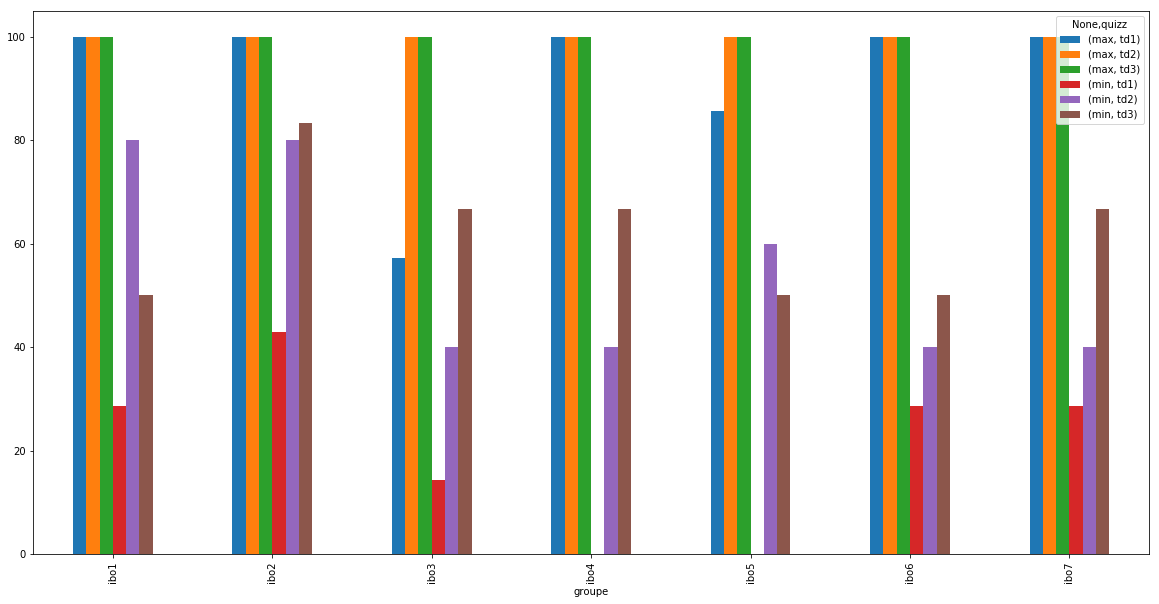

In [1857]:
results['note'].plot(kind='bar')